In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3, Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate
from sklearn.metrics import classification_report




In [ ]:
# paths to your train, valid folders
train_dir = '/content/Skin/Train'
val_dir = '/content/Skin/Vald'
test_dir = '/content/Skin/Test'

# Set the image size and batch size
img_size = (224, 224)
batch_size = 24
num_classes = 4



In [ ]:
!unzip '/content/drive/MyDrive/SkinDiseases/Skin.zip'

Archive:  /content/drive/MyDrive/SkinDiseases/Skin.zip
   creating: Skin/Test/
   creating: Skin/Test/Chickenpox/
  inflating: Skin/Test/Chickenpox/chickenpox101.png  
  inflating: Skin/Test/Chickenpox/chickenpox26.png  
  inflating: Skin/Test/Chickenpox/chickenpox34.png  
  inflating: Skin/Test/Chickenpox/chickenpox36.png  
  inflating: Skin/Test/Chickenpox/chickenpox44.png  
  inflating: Skin/Test/Chickenpox/chickenpox5.png  
  inflating: Skin/Test/Chickenpox/chickenpox74.png  
  inflating: Skin/Test/Chickenpox/chickenpox75.png  
  inflating: Skin/Test/Chickenpox/chickenpox77.png  
  inflating: Skin/Test/Chickenpox/chickenpox82.png  
  inflating: Skin/Test/Chickenpox/chickenpox89.png  
   creating: Skin/Test/Measle/
  inflating: Skin/Test/Measle/measles25.png  
  inflating: Skin/Test/Measle/measles27.png  
  inflating: Skin/Test/Measle/measles30.png  
  inflating: Skin/Test/Measle/measles41.png  
  inflating: Skin/Test/Measle/measles47.png  
  inflating: Skin/Test/Measle/measles53.pn

In [ ]:
#  data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)


In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
xception_model = Xception(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the layers in the pre-trained models
for layer in resnet_model.layers:
    layer.trainable = False

for layer in inception_model.layers:
    layer.trainable = False

for layer in xception_model.layers:
    layer.trainable = False



83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
# Build the model architecture
input_tensor = tf.keras.layers.Input(shape=(img_size[0], img_size[1], 3))
resnet_output = resnet_model(input_tensor)
inception_output = inception_model(input_tensor)
xception_output = xception_model(input_tensor)

In [ ]:
# Resize the output tensors to a consistent shape
resnet_output_resized = tf.keras.layers.GlobalAveragePooling2D()(resnet_output)
inception_output_resized = tf.keras.layers.GlobalAveragePooling2D()(inception_output)
xception_output_resized = tf.keras.layers.GlobalAveragePooling2D()(xception_output)



In [ ]:
from tensorflow.keras.layers import Dense, Concatenate

In [ ]:
# Concatenate the resized output tensors
merged_output = Concatenate()([resnet_output_resized, inception_output_resized, xception_output_resized])
hidden_units = 128

# Add a hidden layer
hidden_layer = Dense(units=hidden_units, activation='relu')(merged_output)

# Add the final output layer
output = Dense(num_classes, activation='softmax')(hidden_layer)

# Create the model
model = tf.keras.models.Model(inputs=input_tensor, outputs=output)



In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Create data generators for train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 843 images belonging to 4 classes.
Found 275 images belonging to 4 classes.
Found 52 images belonging to 4 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=100,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


Epoch 1/100
36/36 [==============================] - 43s 640ms/step - loss: 1.1206 - accuracy: 0.6168 - val_loss: 0.6874 - val_accuracy: 0.7600
Epoch 2/100
36/36 [==============================] - 16s 452ms/step - loss: 0.5748 - accuracy: 0.8055 - val_loss: 0.5308 - val_accuracy: 0.8218
Epoch 3/100
36/36 [==============================] - 16s 445ms/step - loss: 0.4332 - accuracy: 0.8565 - val_loss: 0.5480 - val_accuracy: 0.8000
Epoch 4/100
36/36 [==============================] - 16s 447ms/step - loss: 0.4034 - accuracy: 0.8553 - val_loss: 0.5753 - val_accuracy: 0.7927
Epoch 5/100
36/36 [==============================] - 16s 445ms/step - loss: 0.3315 - accuracy: 0.8861 - val_loss: 0.4577 - val_accuracy: 0.8436
Epoch 6/100
36/36 [==============================] - 16s 449ms/step - loss: 0.2970 - accuracy: 0.8932 - val_loss: 0.3890 - val_accuracy: 0.8836
Epoch 7/100
36/36 [==============================] - 19s 520ms/step - loss: 0.2538 - accuracy: 0.9122 - val_loss: 0.4990 - val_accuracy:

In [ ]:
import numpy as np
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
class_labels = list(val_generator.class_indices.keys())
print( classification_report(val_generator.classes, y_pred, target_names=class_labels))

12/12 [==============================] - 3s 219ms/step
              precision    recall  f1-score   support

  Chickenpox       0.89      0.73      0.80        66
     Measles       0.89      0.82      0.85        60
   Monkeypox       0.76      0.99      0.86        75
      Normal       0.90      0.84      0.87        74

    accuracy                           0.85       275
   macro avg       0.86      0.84      0.84       275
weighted avg       0.86      0.85      0.85       275



In [ ]:
!pip install scikit-learn
!pip install matplotlib

# Generate classification report
report = classification_report(val_generator.classes, y_pred, target_names=class_labels)
print("Classification Report:")
print(report)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Classification Report:
              precision    recall  f1-score   support

  Chickenpox       0.89      0.73      0.80        66
     Measles       0.89      0.82      0.85        60
   Monkeypox       0.76      0.99      0.86        75
      Normal       0.90      0.84      0.87        74

    accuracy                           0.85       275
   macro avg       0.86      0.84      0.84       275
weighted avg       0.86      0.85      0.85       275



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
class_labels = list(val_generator.class_indices.keys())
# Generate confusion matrix
cm = confusion_matrix(val_generator.classes, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

12/12 [==============================] - 3s 219ms/step
Confusion Matrix:
[[48  4  7  7]
 [ 6 49  5  0]
 [ 0  1 74  0]
 [ 0  1 11 62]]


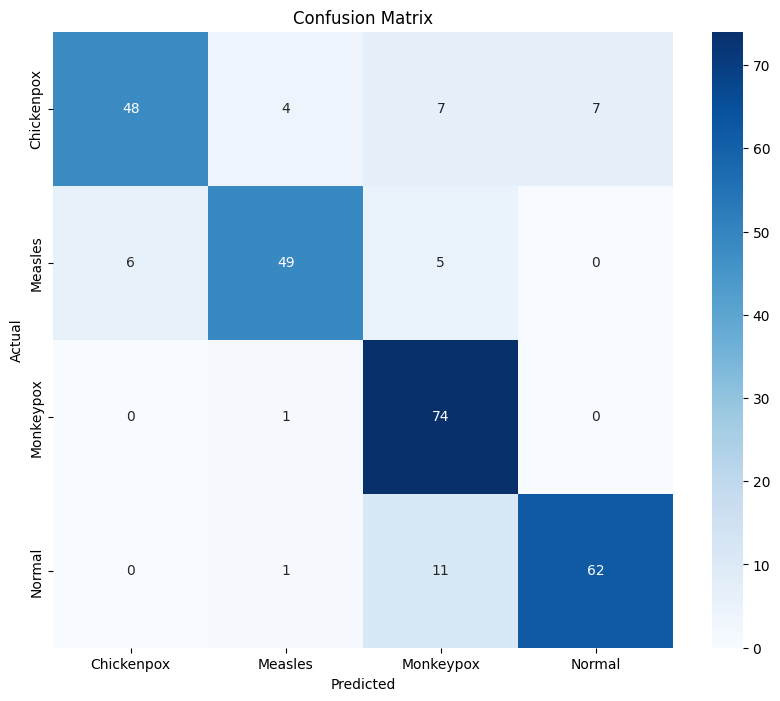

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()